# Building an AI Classifier: Identifying Cats, Dogs & Pandas with PyTorch
**NAME : HARIHARAN J**
**REG NO : 212223240047**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/Cat-Dog_Pandas-20251111T035620Z-1-001.zip" .


In [ ]:
!unzip -q Cat-Dog_Pandas-20251111T035620Z-1-001.zip


In [ ]:
!ls Cat-Dog_Pandas


Test  Train  Valid


In [ ]:
!pip install torch torchvision torchaudio scikit-learn matplotlib --quiet


In [ ]:
train_path = "/content/Cat-Dog_Pandas/Train"
valid_path = "/content/Cat-Dog_Pandas/Valid"
test_path  = "/content/Cat-Dog_Pandas/Test"


In [ ]:
!ls /content/Cat-Dog_Pandas


Test  Train  Valid


In [ ]:
!ls /content/Cat-Dog_Pandas/Train
!ls /content/Cat-Dog_Pandas/Valid
!ls /content/Cat-Dog_Pandas/Test


cat  dog  panda
cat  dog  panda
100000.jpg  110000.jpg	120000.jpg  130000.jpg	140000.jpg  150000.jpg
100100.jpg  110100.jpg	120100.jpg  130100.jpg	140100.jpg  150100.jpg
100200.jpg  110200.jpg	120200.jpg  130200.jpg	140200.jpg  150200.jpg
100300.jpg  110300.jpg	120300.jpg  130300.jpg	140300.jpg  150300.jpg
100400.jpg  110400.jpg	120400.jpg  130400.jpg	140400.jpg  150400.jpg
100500.jpg  110500.jpg	120500.jpg  130500.jpg	140500.jpg  150500.jpg
100600.jpg  110600.jpg	120600.jpg  130600.jpg	140600.jpg  150600.jpg
100700.jpg  110700.jpg	120700.jpg  130700.jpg	140700.jpg  150700.jpg
100800.jpg  110800.jpg	120800.jpg  130800.jpg	140800.jpg  150800.jpg
100900.jpg  110900.jpg	120900.jpg  130900.jpg	140900.jpg  150900.jpg
101000.jpg  111000.jpg	121000.jpg  131000.jpg	141000.jpg  151000.jpg
101100.jpg  111100.jpg	121100.jpg  131100.jpg	141100.jpg  151100.jpg
101200.jpg  111200.jpg	121200.jpg  131200.jpg	141200.jpg  151200.jpg
101300.jpg  111300.jpg	121300.jpg  131300.jpg	141300.jpg  151300.jpg
10

In [ ]:
train_path = "/content/Cat-Dog_Pandas/Train"
valid_path = "/content/Cat-Dog_Pandas/Valid"

# Option 1 → VALID used as TEST (Recommended)
test_path  = "/content/Cat-Dog_Pandas/Valid"


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Training transformations (with augmentation)
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Validation / Test transformations
test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
train_data = datasets.ImageFolder(train_path, transform=train_transforms)
valid_data = datasets.ImageFolder(valid_path, transform=test_transforms)
test_data  = datasets.ImageFolder(test_path,  transform=test_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [ ]:
model = models.resnet18(pretrained=True)

# Freeze backbone
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 3)  # 3 classes
)

model = model.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 68.3MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)


In [ ]:
from tqdm import tqdm

best_acc = 0

for epoch in range(10):
    print(f"\nEpoch {epoch+1}/10")
    model.train()
    running_loss = 0

    for img, lbl in tqdm(train_loader):
        img, lbl = img.to(device), lbl.to(device)

        optimizer.zero_grad()
        out = model(img)
        loss = criterion(out, lbl)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print("Training Loss:", running_loss / len(train_loader))

    # Validation accuracy
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for img, lbl in valid_loader:
            img, lbl = img.to(device), lbl.to(device)
            out = model(img)
            _, pred = torch.max(out, 1)
            correct += (pred == lbl).sum().item()
            total += lbl.size(0)

    acc = 100 * correct / total
    print("Validation Accuracy:", acc)

    if acc > best_acc:
        best_acc = acc
        torch.save(model.state_dict(), "best_model.pth")
        print("Best model saved!")



Epoch 1/10


100%|██████████| 66/66 [03:50<00:00,  3.49s/it]


Training Loss: 0.27411832699947286
Validation Accuracy: 94.33333333333333
Best model saved!

Epoch 2/10


100%|██████████| 66/66 [03:35<00:00,  3.27s/it]


Training Loss: 0.16334488050955714
Validation Accuracy: 96.0
Best model saved!

Epoch 3/10


100%|██████████| 66/66 [03:41<00:00,  3.36s/it]


Training Loss: 0.14181896565820684
Validation Accuracy: 95.66666666666667

Epoch 4/10


100%|██████████| 66/66 [03:42<00:00,  3.37s/it]


Training Loss: 0.12169346337517102
Validation Accuracy: 95.0

Epoch 5/10


100%|██████████| 66/66 [03:38<00:00,  3.32s/it]


Training Loss: 0.10049015800750842
Validation Accuracy: 96.33333333333333
Best model saved!

Epoch 6/10


100%|██████████| 66/66 [03:45<00:00,  3.42s/it]


Training Loss: 0.08876654607328502
Validation Accuracy: 96.33333333333333

Epoch 7/10


100%|██████████| 66/66 [03:36<00:00,  3.27s/it]


Training Loss: 0.11690908398084117
Validation Accuracy: 95.66666666666667

Epoch 8/10


100%|██████████| 66/66 [03:44<00:00,  3.40s/it]


Training Loss: 0.08563002670240222
Validation Accuracy: 94.33333333333333

Epoch 9/10


100%|██████████| 66/66 [04:00<00:00,  3.64s/it]


Training Loss: 0.08104993241740334
Validation Accuracy: 96.33333333333333

Epoch 10/10


100%|██████████| 66/66 [03:38<00:00,  3.31s/it]


Training Loss: 0.07347754036273921
Validation Accuracy: 96.33333333333333


In [ ]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

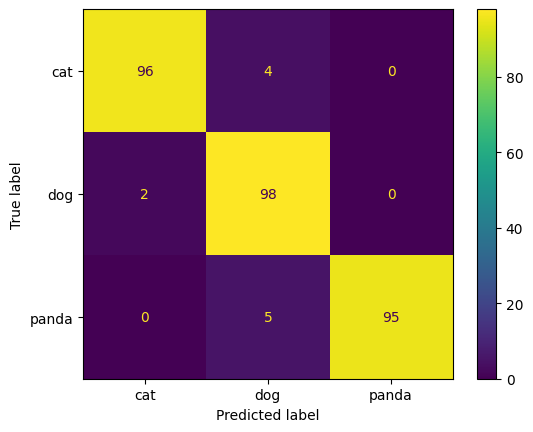

Test Accuracy: 96.33333333333334


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = []
y_pred = []

with torch.no_grad():
    for img, lbl in test_loader:
        img = img.to(device)
        out = model(img)
        _, pred = torch.max(out, 1)

        y_true.extend(lbl.numpy())
        y_pred.extend(pred.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=train_data.classes)
disp.plot()
plt.show()

print("Test Accuracy:", np.mean(np.array(y_true) == np.array(y_pred)) * 100)


In [ ]:
from PIL import Image

def predict_image(path):
    img = Image.open(path).convert("RGB")
    img = test_transforms(img).unsqueeze(0).to(device)

    with torch.no_grad():
        out = model(img)
        _, pred = torch.max(out, 1)

    return train_data.classes[pred.item()]


In [ ]:
!ls /content/Cat-Dog_Pandas/Valid/cat | head


cats_00005.jpg
cats_00009.jpg
cats_00015.jpg
cats_00022.jpg
cats_00030.jpg
cats_00032.jpg
cats_00039.jpg
cats_00046.jpg
cats_00049.jpg
cats_00074.jpg


In [ ]:
!ls /content/Cat-Dog_Pandas/Valid/cat | tail


cats_00714.jpg
cats_00715.jpg
cats_00717.jpg
cats_00721.jpg
cats_00740.jpg
cats_00746.jpg
cats_00775.jpg
cats_00776.jpg
cats_00783.jpg
cats_00795.jpg


In [ ]:
predict_image("/content/Cat-Dog_Pandas/Valid/cat/cats_00039.jpg")


'cat'